# Anleitung
* Der Python-Code ist in Abschnitte (Zellen) aufgeteilt, die nacheinander ausgeführt werden sollen.
* Drücken Sie ESC, dann können Sie auch mit den Pfeiltasten eine Zelle auswählen
* Drücken Sie ENTER, um in den Edit-Modus einer Zelle zu gelangen
* Zum Ausführen einer Zelle im Edit Modus drücken Sie die Tastenkombination SHIFT+ENTER. Dabei springen Sie automatisch zur nächsten Zelle
* Um Eine Liste von Tastenkombinationen zu erhalten, drücken Sie im Edit-Modus einer Zelle ESC gefolgt von h

# Setup
## Importieren benötigter Pythonbibliotheken
    numpy: Mathebibliothek
    matplotlib: Grafische 2D-Darstellungen
    impl_toolkits.plot3d: 3D-Darstellungen
    ipywidgets.interactive: Interaktives Grafiken
## Plot-Settings
    plt.rcParams: Anpassung der Figure Größen im Notebook

In [82]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive
import matplotlib.image as mpimg
plt.rcParams.update({'font.size': 22})

# Python Einführung
* Hier verwenden wir die wichtige Mathematik Bibliothek NumPy mit dem Kürzel np

In [3]:
delta = 0.5
x = np.arange(-3,3,delta)
print(x)

[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]


In [4]:
print(3*x)

[-9.  -7.5 -6.  -4.5 -3.  -1.5  0.   1.5  3.   4.5  6.   7.5]


# Festlegen der Koordinaten auf einem 2d-Raster

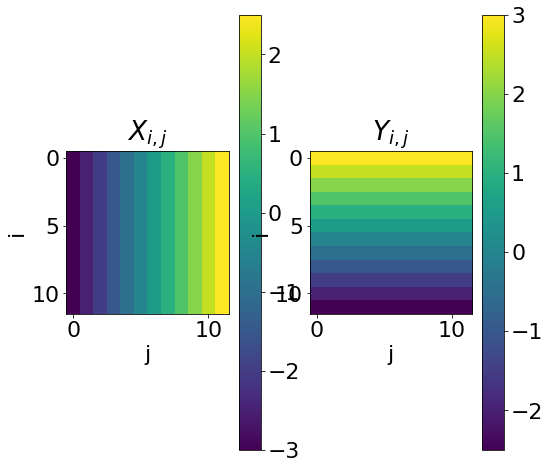

In [5]:
delta = 0.5
x = np.arange(-3,3,delta)
y = np.arange(-3,3,delta)
X, Y = np.meshgrid(x,-y)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(X,interpolation='none')
plt.title('$X_{i,j}$')
plt.ylabel('i')
plt.xlabel('j')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(Y,interpolation='none')
plt.title('$Y_{i,j}$')
plt.ylabel('i')
plt.xlabel('j')
plt.colorbar()

# Kapitel Gradient

## Beispiel 1

<h1> $f(x,y) = -(x^2+3y^2)$

$\partial_x f(x,y) = -2x$, $\qquad\partial_y f(x,y) = -6y$

$\vec{\nabla}f = -\left(\begin{array}{c}2 x\\ 6 y \end{array}\right)$
</h1>

In [8]:
delta = 0.1
x = np.arange(-3,3,delta)
y = np.arange(-3,3,delta)
"""
Zum Auswerten einer 2d-Funktion in einer Ebene benötigt man Koordinatenraster, welche
die x und y Koordinaten an jedem Punkt der Ebene enthalten.
"""
X, Y = np.meshgrid(x,-y)

f = -(X**2 + 3*Y**2) # Hier erstellen wir eine Matrix mit den Funktionswerten auf dem definierten X-Y-Raster
print(f[0:3,0:3])

[[-36.   -35.41 -34.84]
 [-34.23 -33.64 -33.07]
 [-32.52 -31.93 -31.36]]


## Zeichnen der Graphen mit Matplotlib-Bibliothek

In [9]:
%matplotlib widget
fig = plt.figure(figsize=(8,4))
plt.clf()


ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_wireframe(X, Y, f, rstride=1, cstride=1) # Graph mit Höhenkoodierung des Funktionswertes
plt.xlabel('x')
plt.ylabel('y')
ax1.view_init(30,120)

ax2 = fig.add_subplot(1, 2, 2)
h = ax2.imshow(f, extent=[x.min(), x.max(), y.min(), y.max()], cmap='jet') # Graph mit Farbkodierung des Funktionswertes
plt.colorbar(h)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Zeichen eines Graphen mit Vektorfeld des Gradienten

In [11]:
delta = 0.1
x = np.arange(-3,3,delta)
y = np.arange(-3,3,delta)
X, Y = np.meshgrid(x,-y)
f = -(X**2 + Y**2)

"""
Zeichnen der Funktion
"""

%matplotlib widget
fig = plt.figure()
plt.rcParams.update({'font.size': 22})
n = 30
plt.contourf(X, Y, f, n, cmap='jet' )
plt.colorbar()
plt.contour(X, Y, f, colors = 'k', linewidths = 1, linestyles = 'solid')


"""
Benutze gröberes Raster für den Gradienten zur besseren Darstellung
"""

Delta = 4*delta
x = np.arange(-3,3,Delta)
y = np.arange(-3,3,Delta)
X, Y = np.meshgrid(x,-y)
f = -(X**2 + Y**2)
"""
Berechnung des Gradienten mit Hilfe einer Funktion der Numpy-Bibliothek - np.gradient
"""
grady, gradx = np.gradient(f,-Delta, Delta)


plt.quiver(X, Y, gradx , grady)
plt.xlim((x.min(),x.max()))
plt.ylim((y.min()+0.1,y.max()))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Zeichnen des Vektorfeldes des Gradienten

In [12]:
plt.figure(figsize=(8,8))
plt.quiver(X, Y, gradx , grady)
plt.xlim((x.min(),x.max()))
plt.ylim((y.min()+0.1,y.max()))
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Beispiel
<h1>
$f(x,y) = (x-0.5)^2-y^2$
</h1>

In [25]:
# Contour plot for regular grid
%matplotlib widget
delta = 0.5
x = np.arange(-10, 10, delta)
y = np.arange(-10, 10, delta)

# Create grid corresponding to xr and yr arrays
X, Y = np.meshgrid (x,-y)
f = (X-0.5)**2 - Y**2

## Zeichnen der Graphen

In [28]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(X, Y, f, rstride=1, cstride=1, cmap=cm.jet)
ax.view_init(30, 120)

dx = delta*10
dy = dx
grady, gradx = np.gradient (f, -dy, dx)
n = 20
fig = plt.figure(figsize=(8,8))
plt.clf()
plt.contourf(X, Y, f, n, cmap='jet')
plt.contour(X, Y, f, colors = 'k', linewidths = 1, linestyles = 'solid')
plt.quiver(X, Y, gradx , grady, scale=70)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Beispiel
<h1> $f(x,y) = \frac{\sin(x^2+y^2)}{x^2+y^2} \cdot |x|$ </h1>

In [40]:
"""
Funktion als Methode definieren. Man beachte, dass Zeilen nach dem ":"
mit einer "Tabulator-Weite" eingerückt werden müssen. Ansonsten kann die 
Funktionsdefinition nicht verstanden werden.
"""

def F(x,y):
    return np.sin(x**2 + y**2) / (x**2 + y**2 + 1e-4) * abs(x) # Regularisierung an Null durch Addition 1e-4

## Zeichnen der Graphen

In [30]:
delta = 0.1
x = np.arange(-3,3,delta)
y = np.arange(-3,3,delta)
X, Y = np.meshgrid(x,y)
fig = plt.figure()
plt.contourf(x,y,F(X,Y))
plt.colorbar()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [31]:
%matplotlib widget
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(X, Y, F(X,Y), rstride=1, cstride=1, cmap=cm.viridis)
ax.view_init(30,120)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Gradientenberechnung

In [60]:
Delta = 0.35 # Zur beseren Darstellung ein gröberes Raster
x = np.arange(-3,3,Delta)
y = np.arange(-3,3,Delta)
xx, yy = np.meshgrid(x,-y)


gy, gx = np.gradient(F(xx,yy))

## 3D-Graph mit Vektoren

In [61]:
%matplotlib widget
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

"""
Einzeichnen der Vektorpfeile in einen 3D-Plot scheinbar nur punktweise möglich :-(
"""
for ix in range(0, len(x)):
    for iy in range(0, len(y)):
        ax.quiver(x[ix],y[iy],1,gx[iy,ix],gy[iy,ix],0, color='k') # Zeichnet einen Pfeil


ax.plot_surface(X, Y, F(X,Y), rstride=1, cstride=1, cmap=cm.viridis)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Beispiel Interaktion

In [62]:
def f(angle):    
    ax.view_init(20, angle)
    plt.show()
interactive_plot = interactive(f, angle=(0, 360,10))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), Output()), _dom_classes=('w…

## Beispiel 3D-Graph mit eingezeichneten Kurven

In [63]:
# Contour plot for regular grid
%matplotlib widget
delta = 0.5
x = np.arange(-10, 10, delta)
y = np.arange(-10, 10, delta)

# Create grid corresponding to xr and yr arrays
X, Y = np.meshgrid (x,-y)
f = (X-0.5)**2 - Y**2


fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(X, Y, f, rstride=1, cstride=1, cmap=cm.jet, alpha=0.9,zorder=1)
ax.plot(x,np.zeros_like(y), f[np.where(Y==0)],'-k', alpha=1,linewidth=8,zorder=10)
ax.plot(np.zeros_like(x),y, f[np.where(X==0)],'-w', alpha=1,linewidth=8,zorder=10)
ax.plot(0,0, 0.5**2,'-ob', alpha=1,linewidth=8,zorder=10,markersize=14)
ax.view_init(30, 120)
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Kapitel Divergenz

## Hilfsfunktionen

In [64]:
"""
Die Funktion berechnet einen Punkt x0,y0 aus zwei linearen Arrays über die Angabe eines Indexes.
index kann dabei die Werte 0,1, ... Länge(x)*Länge(y) annehmen
"""

def berechneKoordinatenAusIndex(index,x,y):
    ind = 0
    for i in range(0,len(y)):
        for j in range(0,len(x)):
            if ind == index:
                y0 = y[i]
                x0 = x[j]
                return x0,y0
            ind+=1
    return x0,y0

"""
Die Funktion format_coord ermöglicht die Ausgabe der Divergenz unterhalb der Graphen,
wenn man den Mauszeiger über den Graphen bewegt. Relevant ist die Zeile:

div = gx(x,y)+ gy(x,y)

Die Funktionen gx, gy müssen vorher definiert sein.
"""
def format_coord(x, y):
    xarr = np.squeeze(X[0,:])
    yarr = np.squeeze(Y[:,0])
    if ((x > xarr.min()) & (x <= xarr.max()) & 
        (y > yarr.min()) & (y <= yarr.max())):
        col = np.searchsorted(xarr, x)
        row = np.searchsorted(np.flipud(yarr), y)
        div = gx(x,y)+ gy(x,y)

        return f'x={x:1.4f}, y={y:1.4f}, div(x,y)={div:1.4f} '
    else:
        return f'x={x:1.4f}, y={y:1.4f}'


"""
Diese Funktion ermöglicht interaktives updaten eines Graphen
"""
    
def updatePlot(k):
    
    global p1, h
    if (p1):
        p1.remove()
    if (h):
        h.remove()
    x0,y0 = berechneKoordinatenAusIndex(k,points_x,points_y)
    
    plt.quiver(X, Y, Vx(X,Y) , Vy(X,Y))
    plt.xlim((x.min(),x.max()))
    plt.ylim((y.min()+0.1,y.max()))
    p1, = plt.plot(x0,y0,'-ob',markersize=12,label="Punkt (x,y) = ({},{})".format(x0,y0))
    h = plt.legend(handles=[p1], title='Wie groß ist die Divergenz hier?', loc='best', framealpha=0.9)
    plt.rcParams.update({'font.size': 22})
    plt.tight_layout()
    plt.show()

## Beispiel: konstantes, ebenes Vektorfeld
<h1>
$\vec{V}(x,y)=
\left(\begin{array}{c}
c\\
c
\end{array}\right)
$
    
$c= const.$

</h1>

In [65]:
c = 1
delta = 0.5
x = np.arange(-3,3,delta)
y = np.arange(-3,3,delta)
X, Y = np.meshgrid(x,-y)


def Vx(x,y): # Definition einer Funktion zur Ausgabe der X-Komponente des Vektorfeldes
    return c

def Vy(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Vektorfeldes
    return c

def gx(x,y): # Definition einer Funktion zur Ausgabe der X-Komponente des Gradienten
    return 0

def gy(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Gradienten
    return 0

points_x = [-1,0,1]
points_y = [-1,0,1]

y0 = points_y[0]
x0 = points_x[0]

%matplotlib widget
fig = plt.figure(figsize=(8,8))
plt.clf()
plt.rcParams.update({'font.size': 22})


plt.quiver(X, Y, Vx(X,Y) , Vy(X,Y)) # Vektor-Graph
plt.xlim((x.min(),x.max()))
plt.ylim((y.min()+0.1,y.max()))
plt.xlabel('x')
plt.ylabel('y')

plt.title('Konstantes Vektorfeld');
p1, = plt.plot(x0,y0,'-ob',markersize=12,label="Punkt (x,y) = ({},{})".format(x0,y0)) # Graph eines Punktes
h = plt.legend(handles=[p1], title='Wie groß ist die Divergenz hier?', loc='best', framealpha=0.9)
ax = plt.gca()
ax.format_coord = format_coord # ermögliche interaktive Ausgabe der Divergenz
plt.tight_layout()
plt.show()


NP = len(points_x)*len(points_y)
interactive_plot = interactive(updatePlot, k=(0,NP-1))
output = interactive_plot.children[-1]
interactive_plot

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=4, description='k', max=8), Output()), _dom_classes=('widget-interact',)…

## Beispiel: radiales, ebenes Vektorfeld
<h1>
$\vec{V}(x,y)= \frac{1}{\sqrt{x^2+y^2+c}}
\left(\begin{array}{c}
x\\
y
\end{array}\right)
$

$c= const.$
</h1>

In [66]:
c = 1e-3
delta = 0.5
d = 5
x = np.arange(-d,d,delta)
y = np.arange(-d,d,delta)
X, Y = np.meshgrid(x,-y)


def Vx(x,y): # Definition einer Funktion zur Ausgabe der X-Komponente des Vektorfeldes
    return x/(x**2+y**2+c)**(1/2)

def Vy(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Vektorfeldes
    return y/(x**2+y**2+c)**(1/2)


def gx(x,y): # Definition einer Funktion zur Ausgabe der X-Komponente des Gradienten
    r = x**2+y**2+c
    return -x**2/r**(3/2)+1/r**(1/2)

def gy(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Gradienten
    r = x**2+y**2+c
    return -y**2/r**(3/2)+1/r**(1/2)


points_x = [-2,0,2]
points_y = [-2,0,2]

y0 = points_y[0]
x0 = points_x[0]

%matplotlib widget
fig = plt.figure(figsize=(8,8))
plt.clf()

plt.quiver(X, Y, Vx(X,Y) , Vy(X,Y)) # Vektor-Graph
plt.xlim((x.min(),x.max()))
plt.ylim((y.min()+0.1,y.max()))
plt.xlabel('x')
plt.ylabel('y')

plt.title('Radiales Vektorfeld');
p1, = plt.plot(x0,y0,'-ob',markersize=12,label="Punkt (x,y) = ({},{})".format(x0,y0)) # Graph eines Punktes
h = plt.legend(handles=[p1], title='Wie groß ist die Divergenz hier?', loc='best')
ax = plt.gca()
ax.format_coord = format_coord
plt.show()
plt.tight_layout()


NP = len(points_x)*len(points_y)
interactive_plot = interactive(updatePlot, k=(0,NP-1))
output = interactive_plot.children[-1]
interactive_plot

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=4, description='k', max=8), Output()), _dom_classes=('widget-interact',)…

## Beispiel: ebenes Vektorfeld
<h1>
$\vec{V}(x,y)= c
\left(\begin{array}{c}
|y|\\
0
\end{array}\right)
$

$c= const.$
</h1>

In [68]:
delta = 0.5
d = 3
x = np.arange(-d,d,delta)
y = np.arange(-d,d,delta)
X, Y = np.meshgrid(x,-y)


c = 2
def Vx(x,y): # Definition einer Funktion zur Ausgabe der X-Komponente des Vektorfeldes
    return c*abs(y)

def Vy(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Vektorfeldes
    return 0


def gx(x,y): # Definition einer Funktion zur Ausgabe der X-Komponente des Gradienten
    return 0

def gy(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Gradienten
    return 0


points_x = [-2,0,2]
points_y = [-2,0,2]

y0 = points_y[0]
x0 = points_x[0]

%matplotlib widget
fig = plt.figure(figsize=(8,8))
plt.clf()


plt.quiver(X, Y, Vx(X,Y) , Vy(X,Y)) # Vektor-Graph
plt.xlim((x.min(),x.max()))
plt.ylim((y.min()+0.1,y.max()))
plt.xlabel('x')
plt.ylabel('y')

plt.title('Beispiel Vektorfeld');
p1, = plt.plot(x0,y0,'-ob',markersize=12,label="Punkt (x,y) = ({},{})".format(x0,y0))
#h = plt.legend(handles=[p1], title='Wie groß ist die Divergenz hier?', bbox_to_anchor=(1.05, 1), loc='upper left')
h = plt.legend(handles=[p1], title='Wie groß ist die Divergenz hier?', loc='best')
ax = plt.gca()
ax.format_coord = format_coord
plt.tight_layout()
plt.show()


NP = len(points_x)*len(points_y)
interactive_plot = interactive(updatePlot, k=(0,NP-1))
output = interactive_plot.children[-1]
interactive_plot

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=4, description='k', max=8), Output()), _dom_classes=('widget-interact',)…

## Beispiel: ebenes Vektorfeld
<h1>
$\vec{V}(x,y)= -c
\left(\begin{array}{c}
0\\
y
\end{array}\right)
$

$c= const.$
</h1>

In [69]:
delta = 0.5
d = 3
x = np.arange(-d,d,delta)
y = np.arange(-d,d,delta)
X, Y = np.meshgrid(x,-y)


c = 1
def Vx(x,y): # Definition einer Funktion zur Ausgabe der X-Komponente des Vektorfeldes
    return 0

def Vy(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Vektorfeldes
    return -c*y


def gx(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Gradienten
    return 0

def gy(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Gradienten
    return -c


points_x = [-1,0,1]
points_y = [-1,0,1]

y0 = points_y[0]
x0 = points_x[0]

%matplotlib widget
fig = plt.figure(figsize=(8,8))


plt.quiver(X, Y, Vx(X,Y) , Vy(X,Y)) # Vektorfeld
plt.xlim((x.min(),x.max()))
plt.ylim((y.min()+0.1,y.max()))
plt.xlabel('x')
plt.ylabel('y')

plt.title('Beispiel Vektorfeld');
p1, = plt.plot(x0,y0,'-ob',markersize=12,label="Punkt (x,y) = ({},{})".format(x0,y0)) # Graph eines Punktes
h = plt.legend(handles=[p1], title='Wie groß ist die Divergenz hier?',loc='best')
ax = plt.gca()
ax.format_coord = format_coord
plt.show()
plt.tight_layout()


NP = len(points_x)*len(points_y)
interactive_plot = interactive(updatePlot, k=(0,NP-1))
output = interactive_plot.children[-1]
interactive_plot

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=4, description='k', max=8), Output()), _dom_classes=('widget-interact',)…

## Quiz Vektorfelder

In [70]:
delta = 0.5
x = np.arange(-0.5,3,delta)
y = np.arange(-3,3,delta)
X, Y = np.meshgrid(x,-y)


def Vx(x,y): # Definition einer Funktion zur Ausgabe der X-Komponente des Vektorfeldes
    return np.exp(x)

def Vy(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Vektorfeldes
    return 0

def gx(x,y): # Definition einer Funktion zur Ausgabe der X-Komponente des Gradienten
    return np.exp(x)

def gy(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Gradienten
    return 0

points_x = [0,1,2]
points_y = [0,1,2]

y0 = points_y[0]
x0 = points_x[1]

%matplotlib widget
fig = plt.figure(figsize=(8,8))
plt.clf()
plt.rcParams.update({'font.size': 22})


plt.quiver(X, Y, Vx(X,Y) , Vy(X,Y)) # Vektor-Graph
plt.plot([-0.75+1,0.75+1],[-0.75,-0.75],'-r')
plt.plot([0.75+1,0.75+1],[-0.75,0.75],'-r')
plt.plot([0.75+1,-0.75+1],[0.75,0.75],'-r')
plt.plot([-0.75+1,-0.75+1],[0.75,-0.75],'-r')
plt.xlim((x.min(),x.max()))
plt.ylim((y.min()+0.1,y.max()))
plt.xlabel('x')
plt.ylabel('y')

p1, = plt.plot(x0,y0,'-ob',markersize=12,label="Punkt (x,y) = ({},{})".format(x0,y0)) # Graph eines Punktes
h = plt.legend(handles=[p1], title='Wie groß ist die Divergenz hier?', loc='best', framealpha=0.9)
ax = plt.gca()
ax.format_coord = format_coord # ermögliche interaktive Ausgabe der Divergenz
plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [71]:
delta = 0.5
x = np.arange(-0.5,3,delta)
y = np.arange(-3,3,delta)
X, Y = np.meshgrid(x,-y)


def Vx(x,y): # Definition einer Funktion zur Ausgabe der X-Komponente des Vektorfeldes
    return np.exp(-x)

def Vy(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Vektorfeldes
    return 0

def gx(x,y): # Definition einer Funktion zur Ausgabe der X-Komponente des Gradienten
    return -np.exp(-x)

def gy(x,y): # Definition einer Funktion zur Ausgabe der Y-Komponente des Gradienten
    return 0

points_x = [0,1,2]
points_y = [0,1,2]

y0 = points_y[0]
x0 = points_x[1]

%matplotlib widget
fig = plt.figure(figsize=(8,8))
plt.clf()
plt.rcParams.update({'font.size': 22})


plt.quiver(X, Y, Vx(X,Y) , Vy(X,Y)) # Vektor-Graph
plt.plot([-0.75+1,0.75+1],[-0.75,-0.75],'-r')
plt.plot([0.75+1,0.75+1],[-0.75,0.75],'-r')
plt.plot([0.75+1,-0.75+1],[0.75,0.75],'-r')
plt.plot([-0.75+1,-0.75+1],[0.75,-0.75],'-r')
plt.xlim((x.min(),x.max()))
plt.ylim((y.min()+0.1,y.max()))
plt.xlabel('x')
plt.ylabel('y')

p1, = plt.plot(x0,y0,'-ob',markersize=12,label="Punkt (x,y) = ({},{})".format(x0,y0)) # Graph eines Punktes
h = plt.legend(handles=[p1], title='Wie groß ist die Divergenz hier?', loc='best', framealpha=0.9)
ax = plt.gca()
ax.format_coord = format_coord # ermögliche interaktive Ausgabe der Divergenz
plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Kapitel Rotation

## Hilfsfunktion zur Ausgabe des Rotationswertes unter dem Mauszeiger im Graphen

In [73]:
def format_coord(x, y):
    xarr = np.squeeze(X[0,:])
    yarr = np.squeeze(Y[:,0])
    if ((x > xarr.min()) & (x <= xarr.max()) & 
        (y > yarr.min()) & (y <= yarr.max())):
        col = np.searchsorted(xarr, x)
        row = np.searchsorted(np.flipud(yarr), y)
        rotz = rotVz(x,y) # benötigt die Definition der Methode "rotVz(x,y)"

        return f'x={x:1.4f}, y={y:1.4f}, rot(x,y)={rotz:1.4f} '
    else:
        return f'x={x:1.4f}, y={y:1.4f}'

## Beispiel Geschwindkeitsfeld einer rotierenden Scheibe
<h1>
$\vec{v} = \vec{\omega}\times\vec{r} = 
    \left(\begin{array}{c}
    0\\
    0\\
    \omega_0
    \end{array}\right)\times
    \left(\begin{array}{c}
    x\\
    y\\
    0
    \end{array}\right)
    =
    \omega_0 \left(\begin{array}{c}
    - y\\
    x\\
    0
    \end{array}\right)
$
</h1>
<h1>
$
\vec{\nabla}\times \vec{v} = 
\left( \begin{array}{c}
\frac{\partial {v}_z}{\partial y}- \frac{\partial {v}_y}{\partial z}\\
\frac{\partial {v}_x}{\partial z}- \frac{\partial {v}_z}{\partial x}\\
\frac{\partial {v}_y}{\partial x}- \frac{\partial {v}_x}{\partial y}
\end{array} \right)
= \omega_0\left( \begin{array}{c}
\frac{\partial 0}{\partial y}- \frac{\partial x}{\partial z}\\
\frac{\partial (-y)}{\partial z}- \frac{\partial 0}{\partial x}\\
\frac{\partial x}{\partial x}- \frac{\partial (-y)}{\partial y}
\end{array} \right)
= 2 \omega_0\left( \begin{array}{c}
0\\
0\\
1
\end{array} \right) = 2\vec{\omega}
$
    
</h1>

## Definition der Python Methoden

In [78]:
delta = 0.1
x = np.arange(-3,3,delta)
y = np.arange(-3,3,delta)
X, Y = np.meshgrid(x,-y)

w0 = 1

def Vx(x,y):
    return -w0*y
def Vy(x,y):
    return w0*x

def rotVz(x,y):
    return 2*w0

f =np.sqrt(Vx(X,Y)**2+Vy(X,Y)**2) # Betrag der Geschwindigkeit |v| in einer 2d-Matrix hinterlegt

## Zeichnen des Graphen
### Beobachten Sie die Werte unterhalb der x-Achse für rot(x,y)

In [79]:
%matplotlib widget
fig = plt.figure()
n = 30
plt.contourf(X, Y, f, n, cmap='jet' )
cb = plt.colorbar()
cb.set_label('$\sqrt{v^2_x+v^2_y}$')
plt.contour(X, Y, f, colors = 'k', linewidths = 1, linestyles = 'solid')


Delta = 2*delta
x = np.arange(-3,3,Delta)
y = np.arange(-3,3,Delta)
X, Y = np.meshgrid(x,-y)



plt.quiver(X, Y, -Y , X)
plt.xlim((x.min(),x.max()))
plt.ylim((y.min()+0.1,y.max()))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Geschwindigkeitsfeld')
ax = plt.gca()
ax.format_coord = format_coord
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [80]:
# Nur Vektorfeld zeichnen
plt.figure()
plt.quiver(X, Y, -Y , X)
plt.xlim((x.min(),x.max()))
plt.ylim((y.min()+0.1,y.max()))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Geschwindigkeitsfeld')
ax = plt.gca()
ax.format_coord = format_coord
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Strömende Flüssigkeit im Kanal

In [83]:
img=mpimg.imread('full0001-0240.jpg')
plt.figure()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.xlabel('x-Achse')
plt.ylabel('y-Achse')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'y-Achse')

<h1>
$\vec{V}(x,y,z) = \left(
    \begin{array}{c}
    {v_{max}}-\frac{1}{c} + \frac{1}{y^2+c}\\
    0\\
    0
\end{array}\right)$

$\vec{\nabla}\times\vec{V} = -2\left(
    \begin{array}{c}
    0\\
    0\\
    \frac{y}{y^2+c}
\end{array}\right)$
</h1>

In [84]:
c = 1e-3
vmax = 1+1/c
def Vx(x,y):    
    return 1 + 1/(y**2+c)
def Vy(x,y):    
    return 0

def rotVz(x,y):
    return -2*y/(y**2+c)

N = 100
lim = 0.1
delta = lim/N
x = np.arange(-lim,lim,delta)
y = np.arange(-lim,lim,delta)
X, Y = np.meshgrid(x,-y)
f = Vx(X,Y)

%matplotlib widget
fig = plt.figure()
n = 30
plt.contourf(X, Y, f, n, cmap='jet' )
h = plt.colorbar()
h.ax.set_yticklabels([])
h.ax.set_xticklabels([])

Delta = 10*delta
x = np.arange(-lim,lim,Delta)
y = np.arange(-lim,lim,Delta)
X, Y = np.meshgrid(x,-y)
f = Vx(X,Y)


plt.quiver(X, Y, f , 0*X)
plt.xlim((x.min(),x.max()))
plt.ylim((y.min(),y.max()))
plt.xlabel('x')
plt.ylabel('y')
# plt.title('Geschwindigkeitsfeld')
ax = plt.gca()
ax.format_coord = format_coord
plt.tight_layout()
plt.show()

fig = plt.figure()
plt.plot(y,rotVz(x,y),'-x')
plt.xlabel('y')
plt.ylabel('(rot V)z')
plt.grid()
plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …